In [1]:
import pandas as pd
import numpy as np

In [5]:
data = pd.read_csv('./reviews_token.csv')
data['label'] = 0

In [15]:
for i in range(len(data)):
    if data['star'].iloc[i] == 5 :
        data['label'].iloc[i] = 1
    elif data['star'].iloc[i] == 1 or data['star'].iloc[i] == 2 : #or data['star'].iloc[i] == 3 or data['star'].iloc[i] == 4
        data['label'].iloc[i] = 0

C:\Users\admin\AppData\Local\Temp\ipykernel_10852\979155014.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['label'].iloc[i] = 1
C:\Users\admin\AppData\Local\Temp\ipykernel_10852\979155014.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['label'].iloc[i] = 0


참고 : https://team-ak.tistory.com/2

In [9]:
def print_class_num(df, label_name):            # 이진 클래스의 비율을 알아보기 위한 함수
  n_total = len(df)                             # 데이터의 총 개수
  n_neg = len(df.query(label_name + ' == 0'))   # label로 사용하는 열의 1 개수
  n_pos = len(df.query(label_name + ' == 1'))   # label로 사용하는 열의 0 개수

  print("부정 댓글: {}개, {:.2f}%".format(n_neg, n_neg*100/n_total))
  print("긍정 댓글: {}개, {:.2f}%\n".format(n_pos, n_pos*100/n_total))

  values = df[label_name].value_counts()        # label로 사용하는 열의 값을 카운트 
  values.plot(kind='bar')
  print(values)

In [28]:
data2 = data[data['star']==1]
data2 = data2.append(data[data['star']==2])
data2 = data2.append(data[data['star']==5])
data2

C:\Users\admin\AppData\Local\Temp\ipykernel_10852\3876798870.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data2 = data2.append(data[data['star']==2])
C:\Users\admin\AppData\Local\Temp\ipykernel_10852\3876798870.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data2 = data2.append(data[data['star']==5])


,star,date,vendor,review,help,review_r,tokenized,label
32,1,2021.12.05,쿠팡(주),새로산 모니터에 쓰려고 구매했는데 끼고나서 분해되서 빼 새로산 모니터에 쓰려고 구매...,0,새로 산 모니터에 쓰려고 구매했는데 끼고 나서 분해돼서 빼 새로 산 모니터에 쓰려...,"['새로', '산', '모니터', '에', '쓰려고', '구매', '했는데', '끼...",0
38,1,2022.03.18,쿠팡(주),제가 구입한 케이블은 불량인가요아님 앞서 구매한 분들과는 다른 제품인가요 3시간 정...,1,제가 구입한 케이블은 불량인 가요 아니면 앞서 구매한 분들과는 다른 제품인가요 3...,"['제', '가', '구입', '한', '케이블', '은', '불량', '인', '...",0
49,1,2021.01.14,쿠팡(주),사용중에 갑자기 인식이 안되더니 그뒤로 작동을 안함,4,사용 중에 갑자기 인식이 안되더니 그 뒤로 작동을 안 함,"['사용', '중', '에', '갑자기', '인식', '이', '안되더니', '그'...",0
52,1,2020.10.20,쿠팡(주),사지마삼 쓰레기,0,사지 마감 쓰레기,"['사지', '마감', '쓰레기']",0
64,1,2020.11.07,쿠팡(주),개인적으로 별로에여,0,개인적으로 별로에 여,"['개인', '적', '으로', '별로', '에', '여']",0
...,...,...,...,...,...,...,...,...
144875,5,2021.10.12,주식회사 쓰리윈즈,너무 좋아용 잘 돌아가고 배송도 빨라요,0,너무 좋아요 잘 돌아가고 배송도 빨라요,"['너무', '좋아요', '잘', '돌아가고', '배송', '도', '빨라요']",1
144877,5,2022.08.18,쿠팡(주),게이밍 모니터를 찾던 와중 쿠팡체험단에 당첨되서 BattleG 686cm FHD 유...,3,게이밍 모니터를 찾던 와중 쿠팡 체험단에 당첨돼서 BattleG 686cm FHD ...,"['게이', '밍', '모니터', '를', '찾던', '와중', '쿠팡', '체험'...",1
144879,5,2021.04.07,쿠팡(주),처음 받을땐 불량이 왔지만 처음 받은 상품이 불량이라 기분이 상했지만 쿠팡의 빠른 ...,5,처음 받을 땐 불량이 왔지만 처음 받은 상품이 불량이라 기분이 상했지만 쿠팡의 빠른...,"['처음', '받을', '땐', '불량', '이', '왔지만', '처음', '받은'...",1
144880,5,2021.05.26,쿠팡(주),불량화소 없이 양품으로왔고 포장도 꼼꼼히왔습니다,1,불량화소 없이 양 품으로 왔고 포장도 꼼꼼히 왔습니다,"['불량화소', '없이', '양', '품', '으로', '왔고', '포장', '도'...",1


In [29]:
data2.reset_index(inplace=True)

부정 댓글: 13553개, 11.81%
긍정 댓글: 101203개, 88.19%

1    101203
0     13553
Name: label, dtype: int64


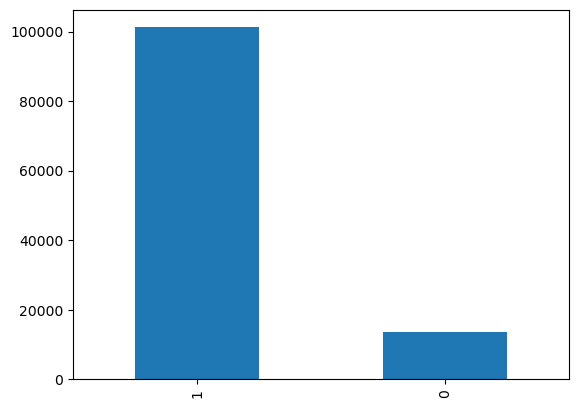

In [30]:
print_class_num(data2, 'label')

In [ ]:
from transformers import BertTokenizer

bert_tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")

In [48]:
from kss import split_sentences
from tqdm import tqdm

In [49]:
tokenized = []
for sent in tqdm(data2['review_r']):
  t = bert_tokenizer.encode_plus(sent,
                                 add_special_tokens=True,
                                 max_length=30,
                                 pad_to_max_length=True,
                                 return_attention_mask=True)
  tokenized.append(t)

  0%|          | 0/114756 [00:00<?, ?it/s]c:\Users\admin\anaconda3\envs\web\lib\site-packages\transformers\tokenization_utils_base.py:2323: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(
100%|██████████| 114756/114756 [01:29<00:00, 1285.97it/s]


In [51]:
tokenized[0:5]

[{'input_ids': [101, 1461, 30007, 29994, 30011, 1461, 30006, 30021, 1459, 30011, 29992, 30019, 30003, 30008, 29999, 30009, 1462, 30017, 29994, 30010, 29991, 30011, 100, 100, 1456, 30006, 29997, 30008, 100, 102], 'token_type_ids': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]},
 {'input_ids': [101, 1464, 30009, 29991, 30006, 1455, 30014, 29999, 30019, 30024, 30005, 30006, 30021, 1466, 30009, 29999, 30019, 29996, 30017, 30022, 29999, 30017, 30021, 100, 1455, 30006, 29999, 30013, 1463, 102], 'token_type_ids': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]},
 {'input_ids': [101, 1461, 30006, 29999, 30013, 30025, 1464, 30014, 30025, 29999, 30009, 1455, 30006, 30024, 30000, 30006, 29991, 

In [52]:
input_ids = []
attention_masks = []
for sent in tokenized:
  input_ids.append(sent['input_ids'])
  attention_masks.append(sent['attention_mask'])

input_ids=np.asarray(input_ids)
attention_masks=np.array(attention_masks)

In [53]:
from sklearn.model_selection import train_test_split

In [54]:
x_train, x_test, y_train, y_test, mask_train, mask_test = train_test_split(input_ids, data2['label'], attention_masks, test_size=0.2, random_state=42)
print("x_train: {}개,\ty_train: {}개".format(len(x_train), len(y_train)))
print("x_test: {}개,\ty_test: {}개".format(len(x_test), len(y_test)))
print("mask_train: {}개,\tmask_test: {}개".format(len(mask_train), len(mask_test)))

x_train: 91804개,	y_train: 91804개
x_test: 22952개,	y_test: 22952개
mask_train: 91804개,	mask_test: 22952개


In [55]:
x_train, x_valid, y_train, y_valid, mask_train, mask_valid = train_test_split(x_train, y_train, mask_train, test_size=0.2, random_state=42)
print("x_train: {}개,\ty_train: {}개".format(len(x_train), len(y_train)))
print("x_valid: {}개,\ty_valid: {}개".format(len(x_valid), len(y_valid)))
print("mask_train: {}개,\tmask_valid: {}개".format(len(mask_train), len(mask_valid)))

x_train: 73443개,	y_train: 73443개
x_valid: 18361개,	y_valid: 18361개
mask_train: 73443개,	mask_valid: 18361개


In [56]:
from transformers import TFBertForSequenceClassification

In [57]:
bert_model1 = TFBertForSequenceClassification.from_pretrained('bert-base-uncased')

All model checkpoint layers were used when initializing TFBertForSequenceClassification.

Some layers of TFBertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [58]:
y_train = pd.DataFrame(y_train)
x_train = pd.DataFrame(x_train)
mask_train = pd.DataFrame(mask_train)

In [68]:
n_train = pd.concat([x_train, mask_train], axis=1)

In [69]:
y_train = y_train['label']
y_t = np.array(y_train)
n_train['label'] = y_t

In [72]:
nn_train = n_train[n_train['label'] == 0]

In [73]:
nn_train

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,label
0,101,1464,30008,30022,29993,30007,1461,30006,30000,30019,...,1,1,1,1,1,1,1,1,1,0
6,101,1018,29997,30019,30001,30006,30020,1460,30011,30000,...,1,1,1,1,1,1,1,1,1,0
15,101,1469,30011,30005,30012,30021,29993,30011,1464,30006,...,1,1,1,1,1,1,1,1,1,0
27,101,1461,30019,29991,30006,30021,29995,30006,30021,100,...,1,1,1,1,1,1,1,1,1,0
35,101,1456,30008,29995,30014,100,1461,30006,30025,30004,...,1,1,1,1,1,1,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73400,101,1463,30019,29994,30008,30021,1464,30009,30021,30000,...,1,1,1,1,1,1,1,1,1,0
73403,101,1465,30014,30025,30000,30008,30021,29999,30019,100,...,0,0,0,0,0,0,0,0,0,0
73409,101,1465,30014,30001,30008,30021,30005,30006,30000,30019,...,1,1,1,1,1,1,1,1,1,0
73431,101,1464,30008,29992,30017,30021,100,1460,30010,30022,...,1,1,1,1,1,1,1,1,1,0


In [74]:
import random
rd_train = nn_train.copy()
rand_num = random.randint(1, 29)

for i in range(len(rd_train)):
    if(int(rd_train.iloc[i, rand_num]) != 0 & int(rd_train.iloc[i, rand_num]) != 102):
      rd_train.iloc[i, rand_num] = 103
    else:
      while(int(rd_train.iloc[i, rand_num]) == 0 & int(rd_train.iloc[i, rand_num]) == 102):
        rand_num = random.randint(1,29)
        if(int(rd_train.iloc[i, rand_num]) != 0 & int(rd_train.iloc[i, rand_num]) != 102):
          rd_train.iloc[i, rand_num] = 103
    rand_num = random.randint(1,29)

In [75]:
rs_train = nn_train.copy()

rand_1 = random.randint(1, 29)
rand_2 = rand_1
while rand_2 == rand_1:
  rand_2 = random.randint(1, 29)

for i in range(len(rs_train)):
    if (int(rs_train.iloc[i, rand_1]) != 0 & int(rs_train.iloc[i, rand_1]) != 102 & int(rs_train.iloc[i, rand_2]) != 0 & int(rs_train.iloc[i, rand_2]) != 102):
      rs_train.iloc[i, rand_1], rs_train.iloc[i, rand_2] = rs_train.iloc[i, rand_2], rs_train.iloc[i, rand_1]

    else:
      while(int(rd_train.iloc[i, rand_1]) == 0 | int(rd_train.iloc[i, rand_1]) == 102 | int(rs_train.iloc[i, rand_2]) == 0 | int(rs_train.iloc[i, rand_2]) == 102):
        if (int(rs_train.iloc[i, rand_1]) != 0 & int(rs_train.iloc[i, rand_1]) != 102 & int(rs_train.iloc[i, rand_2]) != 0 & int(rs_train.iloc[i, rand_2]) != 102):
          rs_train.iloc[i, rand_1], rs_train.iloc[i, rand_2] = rs_train.iloc[i, rand_2], rs_train.iloc[i, rand_1]
        else:
          rand_1 = random.randint(1, 29)
          rand_2 = rand_1
          while rand_2 == rand_1:
            rand_2 = random.randint(1, 29)

    rand_1 = random.randint(1, 29)
    rand_2 = rand_1
    while rand_2 == rand_1:
      rand_2 = random.randint(1, 29)

In [76]:
rs_train

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,label
0,101,1464,30008,30022,29993,30006,1461,30006,30000,30019,...,1,1,1,1,1,1,1,1,1,0
6,101,1018,29997,30019,30001,29997,30020,1460,30011,30000,...,1,1,1,1,1,1,1,1,1,0
15,101,1469,30011,30005,30012,30021,29993,30011,1464,30006,...,1,1,1,1,1,1,1,1,1,0
27,101,1461,30019,29991,30006,30021,100,30006,30021,100,...,1,1,1,1,1,1,1,1,1,0
35,101,1456,30008,29995,30014,30004,1461,30006,30025,100,...,1,1,1,1,1,1,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73400,101,1463,30019,29994,30008,30019,1464,30009,30021,30000,...,1,1,1,1,1,1,1,1,1,0
73403,101,1465,30014,30025,30000,30008,30021,29999,30019,100,...,0,0,0,0,0,0,0,0,0,0
73409,101,1465,30014,30001,30008,30021,30005,30006,30000,30019,...,1,1,1,1,1,1,1,1,1,0
73431,101,1464,30008,29992,30017,30021,30022,1460,30010,100,...,1,1,1,1,1,1,1,1,1,0


In [79]:
result_train = pd.concat([n_train, rs_train, rd_train] , axis=0)

In [85]:
result_train.to_csv('./masked.csv', index=False)

1    64848
0    25785
Name: label, dtype: int64


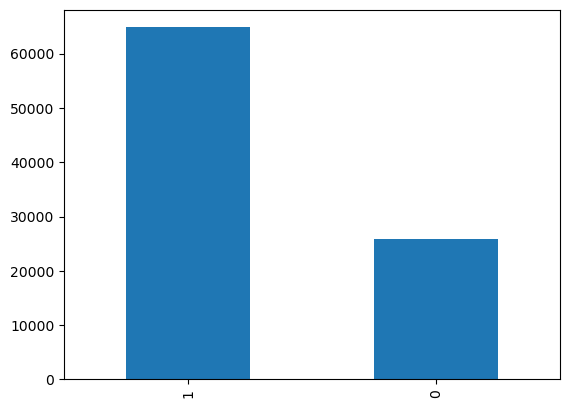

In [80]:
values = result_train['label'].value_counts()
values.plot(kind='bar')
print(values)

In [82]:
import tensorflow as tf

In [83]:
optimizer = tf.keras.optimizers.Adam(learning_rate=2e-5)

In [84]:
bert_model1.compile(optimizer = optimizer, loss='binary_crossentropy', metrics=['accuracy'])

In [86]:
x_train_add = result_train.iloc[:,0:30]
x_train_add


,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,101,1464,30008,30022,29993,30007,1461,30006,30000,30019,...,30007,1461,30006,30000,30019,1459,30006,29997,30009,102
1,101,1464,30008,30025,29995,30006,30022,100,1464,30008,...,30008,29991,30006,29991,30011,1466,30009,29999,30019,102
2,101,1464,30006,30022,100,100,1464,30019,30021,30000,...,29991,30006,30020,29999,30019,1457,30017,30022,1464,102
3,101,1468,30014,30023,30000,30019,30022,29999,30017,30021,...,30024,29997,30017,30024,29992,30019,29993,30006,1455,102
4,101,1464,30019,30024,29999,30009,29997,30008,29993,30011,...,29991,30011,100,1461,30006,29995,30014,29997,30019,102
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73400,101,1463,30019,29994,30008,30021,103,30009,30021,30000,...,30017,29991,30019,29992,30017,30021,2322,29996,30011,102
73403,101,103,30014,30025,30000,30008,30021,29999,30019,100,...,0,0,0,0,0,0,0,0,0,0
73409,101,1465,30014,30001,30008,30021,30005,30006,30000,30019,...,1459,103,29991,30006,30023,1466,30015,30022,29994,102
73431,101,1464,30008,29992,30017,30021,100,1460,30010,30022,...,30017,30021,1459,30006,103,30014,29997,30017,1461,102


In [88]:
mask_train_add = result_train.iloc[:,30:60]
mask_train_add


,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
1,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
2,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
3,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
4,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73400,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
73403,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
73409,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
73431,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [90]:
y_train_add = result_train.iloc[:,60]
y_train_add

0        0
1        1
2        1
3        1
4        1
        ..
73400    0
73403    0
73409    0
73431    0
73441    0
Name: label, Length: 90633, dtype: int64

In [91]:
history = bert_model1.fit([x_train_add, mask_train_add],
                         y_train_add,
                         epochs=5,
                         validation_data=([x_valid, mask_valid], y_valid),
                         batch_size=32)

Epoch 1/5


KeyboardInterrupt: 